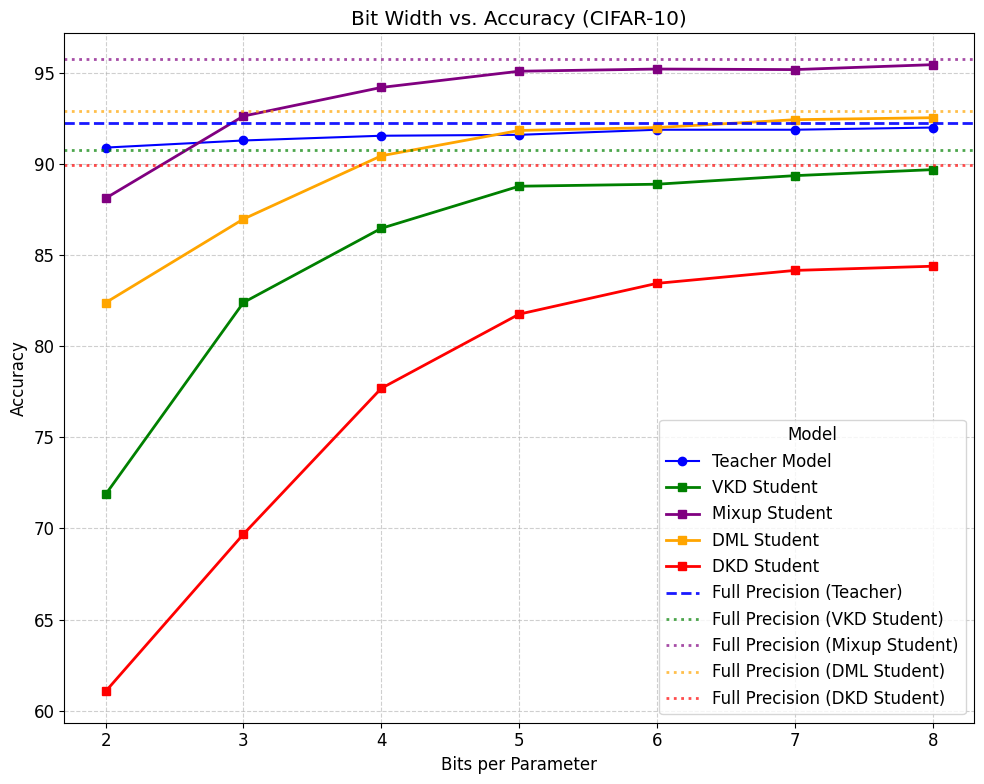

In [2]:
import matplotlib.pyplot as plt

# Define bit widths for quantized values (2 to 8 bits)
bits = [2, 3, 4, 5, 6, 7, 8]

# Quantized accuracies for each model (from your table)
teacher_quant = [90.90, 91.29, 91.55, 91.60, 91.88, 91.88, 92.00]
vkd_quant     = [71.87, 82.40, 86.47, 88.78, 88.89, 89.36, 89.69]
mixup_quant   = [88.12, 92.63, 94.20, 95.09, 95.21, 95.18, 95.45]
dml_quant     = [82.39, 86.98, 90.45, 91.84, 92.00, 92.43, 92.54]
dkd_quant     = [61.06, 69.69, 77.69, 81.76, 83.45, 84.16, 84.39]

# Full-precision (32-bit) accuracies for each model (pre-quantized values)
teacher_pre = 92.25
vkd_pre     = 90.77
mixup_pre   = 95.77
dml_pre     = 92.89
dkd_pre     = 89.95

# Increase the base font size
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(10, 8))

# Plot quantized accuracy data for each model
plt.plot(bits, teacher_quant, marker='o', color='blue', label="Teacher Model")
plt.plot(bits, vkd_quant, marker='s', linewidth=2, color='green', label="VKD Student")
plt.plot(bits, mixup_quant, marker='s', linewidth=2, color='purple', label="Mixup Student")
plt.plot(bits, dml_quant, marker='s', linewidth=2, color='orange', label="DML Student")
plt.plot(bits, dkd_quant, marker='s', linewidth=2, color='red', label="DKD Student")

# Add horizontal lines for the full-precision (32-bit) accuracies
plt.axhline(y=teacher_pre, color='blue', linestyle='--', alpha=0.9, linewidth=2,
            label='Full Precision (Teacher)')
plt.axhline(y=vkd_pre, color='green', linestyle=':', alpha=0.7, linewidth=2,
            label='Full Precision (VKD Student)')
plt.axhline(y=mixup_pre, color='purple', linestyle=':', alpha=0.7, linewidth=2,
            label='Full Precision (Mixup Student)')
plt.axhline(y=dml_pre, color='orange', linestyle=':', alpha=0.7, linewidth=2,
            label='Full Precision (DML Student)')
plt.axhline(y=dkd_pre, color='red', linestyle=':', alpha=0.7, linewidth=2,
            label='Full Precision (DKD Student)')

# Add labels, title, grid, and legend
plt.title("Bit Width vs. Accuracy (CIFAR-10)")
plt.xlabel("Bits per Parameter")
plt.ylabel("Accuracy")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Model", loc="best")

plt.tight_layout()
plt.savefig('../images/quantacc_cifar10.png', dpi=500)
plt.show()


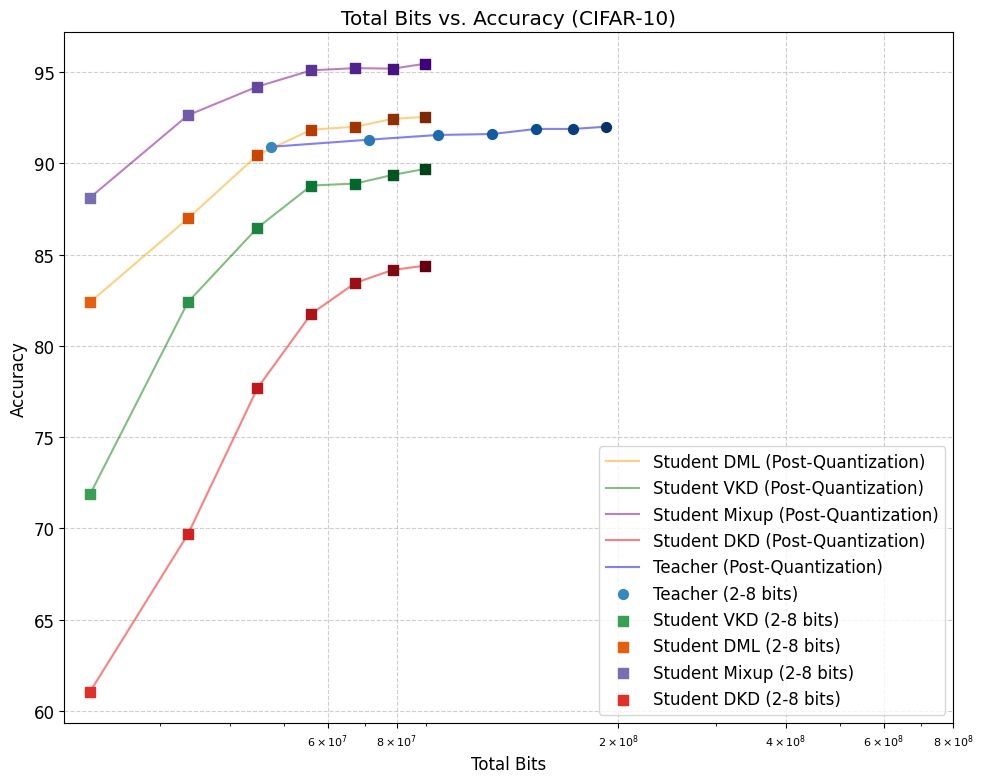

In [3]:
import matplotlib.pyplot as plt

# Number of parameters (provided)
num_parameter_teacher = 23705252
num_parameter_student = 11220132

# Define bit widths for quantized values (2-8 bits)
bits = [2, 3, 4, 5, 6, 7, 8]

# Table data: each list contains [2-bit, 3-bit, 4-bit, 5-bit, 6-bit, 7-bit, 8-bit, 32-bit] accuracies
teacher_data = [90.90, 91.29, 91.55, 91.60, 91.88, 91.88, 92.00, 92.25]
vkd_data     = [71.87, 82.40, 86.47, 88.78, 88.89, 89.36, 89.69, 90.77]
mixup_data   = [88.12, 92.63, 94.20, 95.09, 95.21, 95.18, 95.45, 95.77]
dml_data     = [82.39, 86.98, 90.45, 91.84, 92.00, 92.43, 92.54, 92.89]
dkd_data     = [61.06, 69.69, 77.69, 81.76, 83.45, 84.16, 84.39, 89.95]

# Separate quantized (2-8 bits) and full-precision (32-bit) accuracies
teacher_quant = teacher_data[:-1]
teacher_pre   = teacher_data[-1]

vkd_quant     = vkd_data[:-1]
vkd_pre       = vkd_data[-1]

mixup_quant   = mixup_data[:-1]
mixup_pre     = mixup_data[-1]

dml_quant     = dml_data[:-1]
dml_pre       = dml_data[-1]

dkd_quant     = dkd_data[:-1]
dkd_pre       = dkd_data[-1]

# Compute total bits for each model (for quantized values)
teacher_total_bits = [b * num_parameter_teacher for b in bits]
student_total_bits = [b * num_parameter_student for b in bits]

# Fixed colors for pre-quantization models (if needed)
pre_student_color_dml = "orange"
pre_student_color_van = "green"
pre_teacher_color = "blue"

# Define marker styles – note we assign a different marker for DKD Student (diamond)
marker_mapping = {
    "pre_student": "o",          # Circle for pre-quantization Student
    "post_student": "s",         # Square for post-quantization Student (DML, VKD)
    "pre_teacher": "^",          # Triangle for pre-quantization Teacher
    "post_teacher": "o",         # Circle for post-quantization Teacher
    "post_student_mixup": "s",   # Square for Mixup Student
    "post_student_dkd": "s"      # Diamond for DKD Student
}

# Pre-quantization accuracies (if needed)
pre_quantization_student_van_accuracy = vkd_pre
pre_quantization_student_dml_accuracy = dml_pre
pre_quantization_teacher_accuracy = teacher_pre

# Compute “total bits” for pre-quantization (32-bit)
pre_quantization_student_dml_bit_para = 32 * num_parameter_student
pre_quantization_teacher_bit_para = 32 * num_parameter_teacher

# Create colormaps for the different models
cmap_student_dml = plt.cm.Oranges
cmap_student_van = plt.cm.Greens
cmap_teacher = plt.cm.Blues
cmap_student_mixup = plt.cm.Purples   # for Mixup Student
cmap_student_dkd = plt.cm.Reds        # for DKD Student

# Create normalization functions for mapping total bits to colormap values
norm_student_dml = plt.Normalize(vmin=-5 * min(student_total_bits), vmax=max(student_total_bits))
norm_student_van = plt.Normalize(vmin=-5 * min(student_total_bits), vmax=max(student_total_bits))
norm_teacher = plt.Normalize(vmin=-5 * min(teacher_total_bits), vmax=max(teacher_total_bits))
norm_student_mixup = plt.Normalize(vmin=-5 * min(student_total_bits), vmax=max(student_total_bits))
norm_student_dkd = plt.Normalize(vmin=-5 * min(student_total_bits), vmax=max(student_total_bits))

fig, ax = plt.subplots(figsize=(10, 8))

# Plot line plots for post-quantization accuracy for each student model
ax.plot(student_total_bits, dml_quant, color='orange', alpha=0.5, linestyle='-', linewidth=1.5,
        label="Student DML (Post-Quantization)")
ax.plot(student_total_bits, vkd_quant, color='green', alpha=0.5, linestyle='-', linewidth=1.5,
        label="Student VKD (Post-Quantization)")
ax.plot(student_total_bits, mixup_quant, color='purple', alpha=0.5, linestyle='-', linewidth=1.5,
        label="Student Mixup (Post-Quantization)")
ax.plot(student_total_bits, dkd_quant, color='red', alpha=0.5, linestyle='-', linewidth=1.5,
        label="Student DKD (Post-Quantization)")

# Plot line for Teacher (post-quantization)
ax.plot(teacher_total_bits, teacher_quant, color='blue', alpha=0.5, linestyle='-', linewidth=1.5,
        label="Teacher (Post-Quantization)")

# Plot scatter points with colormaps

# Teacher scatter (post-quantization)
for i, bits_val in enumerate(teacher_total_bits):
    color_teacher = cmap_teacher(norm_teacher(bits_val))
    ax.scatter(bits_val, teacher_quant[i], color=color_teacher, marker=marker_mapping["post_teacher"],
               s=50, zorder=10, label="Teacher (2-8 bits)" if i == 0 else "")

# Student VKD scatter (post-quantization)
for i, bits_val in enumerate(student_total_bits):
    color_student = cmap_student_van(norm_student_van(bits_val))
    ax.scatter(bits_val, vkd_quant[i], color=color_student, marker=marker_mapping["post_student"],
               s=50, zorder=10, label="Student VKD (2-8 bits)" if i == 0 else "")

# Student DML scatter (post-quantization)
for i, bits_val in enumerate(student_total_bits):
    color_student = cmap_student_dml(norm_student_dml(bits_val))
    ax.scatter(bits_val, dml_quant[i], color=color_student, marker=marker_mapping["post_student"],
               s=50, zorder=10, label="Student DML (2-8 bits)" if i == 0 else "")

# Student Mixup scatter (post-quantization)
for i, bits_val in enumerate(student_total_bits):
    color_student = cmap_student_mixup(norm_student_mixup(bits_val))
    ax.scatter(bits_val, mixup_quant[i], color=color_student, marker=marker_mapping["post_student_mixup"],
               s=50, zorder=10, label="Student Mixup (2-8 bits)" if i == 0 else "")

# Student DKD scatter (post-quantization)
for i, bits_val in enumerate(student_total_bits):
    color_student = cmap_student_dkd(norm_student_dkd(bits_val))
    ax.scatter(bits_val, dkd_quant[i], color=color_student, marker=marker_mapping["post_student_dkd"],
               s=50, zorder=10, label="Student DKD (2-8 bits)" if i == 0 else "")

# (Optional) Uncomment the following lines to plot pre-quantization scatter points:
# ax.scatter(pre_quantization_teacher_bit_para, pre_quantization_teacher_accuracy, 
#            color=pre_teacher_color, marker=marker_mapping["pre_teacher"], 
#            label="Teacher (Pre-Quantization)", s=40, zorder=10)
# ax.scatter(pre_quantization_student_dml_bit_para, pre_quantization_student_dml_accuracy, 
#            color=pre_student_color_dml, marker=marker_mapping["pre_student"], 
#            label="Student DML (Pre-Quantization)", s=40, zorder=10)
# ax.scatter(pre_quantization_student_dml_bit_para, pre_quantization_student_van_accuracy, 
#            color=pre_student_color_van, marker=marker_mapping["pre_student"], 
#            label="Student VKD (Pre-Quantization)", s=40, zorder=10)

# Labels, title, legend, and grid
plt.xlabel("Total Bits")
plt.ylabel("Accuracy")
plt.title("Total Bits vs. Accuracy (CIFAR-10)")
plt.xscale("log")  # Logarithmic scale for Total Bits

# Adjust x-axis range: set the maximum to 2*10^8
ax.set_xlim(right=2 * 10**8)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Customizing x-axis ticks (for values roughly between 10^7 and 10^8)
tick_values = []
tick_labels = []
for i in range(7, 9):  # for powers 10^7 to 10^8
    for k in range(2, 10, 2):
        value = k * 10**i
        if value > 5 * 10**7:
            tick_values.append(value)
            tick_labels.append(f'${k} \\times 10^{i}$')

plt.xticks(tick_values, tick_labels, rotation=0, fontsize=8)

plt.tight_layout()
plt.savefig('../images/bitsparams_cifar10.png', dpi=500)
plt.show()
